In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../src")

from clustering_library import DataCleaner, DataVisualizer
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
visualizer = DataVisualizer()

## Loading data

In [3]:
data_path = "../data/raw/online_retail.csv"

cleaner = DataCleaner(data_path)
df = cleaner.load_data()

df.head()

Data size: (541909, 8)
Number of Records: 541,909


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,017850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,017850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,017850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,017850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,017850,United Kingdom


In [4]:
print("General Information:")
print(f"- Size: {df.shape[0]:,} rows x {df.shape[1]} columns")
print(f"- Missing Values: {df.isnull().sum().sum():,} total")
print(f"- Unique customer: {df['CustomerID'].nunique():,}")

df.info()

General Information:
- Size: 541,909 rows x 8 columns
- Missing Values: 1,454 total
- Unique customer: 4,373
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


## Clean data
Clean data by:
1. TotalPrice (Quantity x UnitPrice)
2. Remove cancel invoices (Start with 'C')
3. Focus on UK customer only
4. Remove missing values CustomerID
5. Remove invalid quantity or unit price

In [5]:
df_uk = cleaner.clean_data()

cleaner.create_time_features()

print(f"Cleaned Results:")
print(f"- Raw data: {df.shape[0]:,} transactions")
print(f"- Cleaned data: {df_uk.shape[0]:,} transactions")
print(f"- Removed: {df.shape[0] - df_uk.shape[0]:,} transactions ({(df.shape[0] - df_uk.shape[0]) / df.shape[0] * 100:.1f}%)")
print(f"- UK Customers: {df_uk['CustomerID'].nunique():,}")

df_uk.head()

Cleaned Results:
- Raw data: 541,909 transactions
- Cleaned data: 485,123 transactions
- Removed: 56,786 transactions (10.5%)
- UK Customers: 3,921


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,HourOfDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,017850,United Kingdom,15.30,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,017850,United Kingdom,20.34,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,017850,United Kingdom,22.00,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,017850,United Kingdom,20.34,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,017850,United Kingdom,20.34,2,8


## Simple EDA

### Revenue overtime

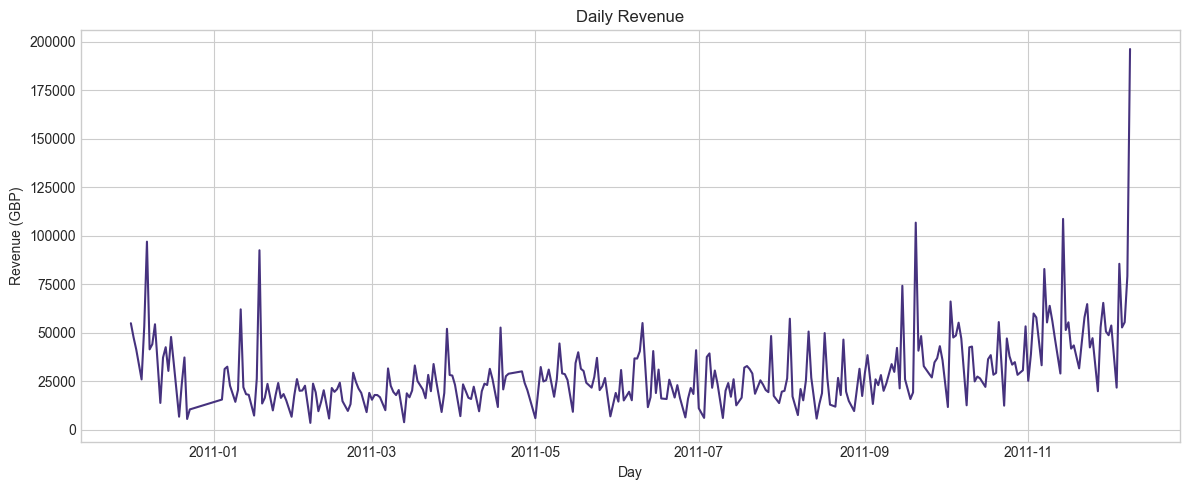

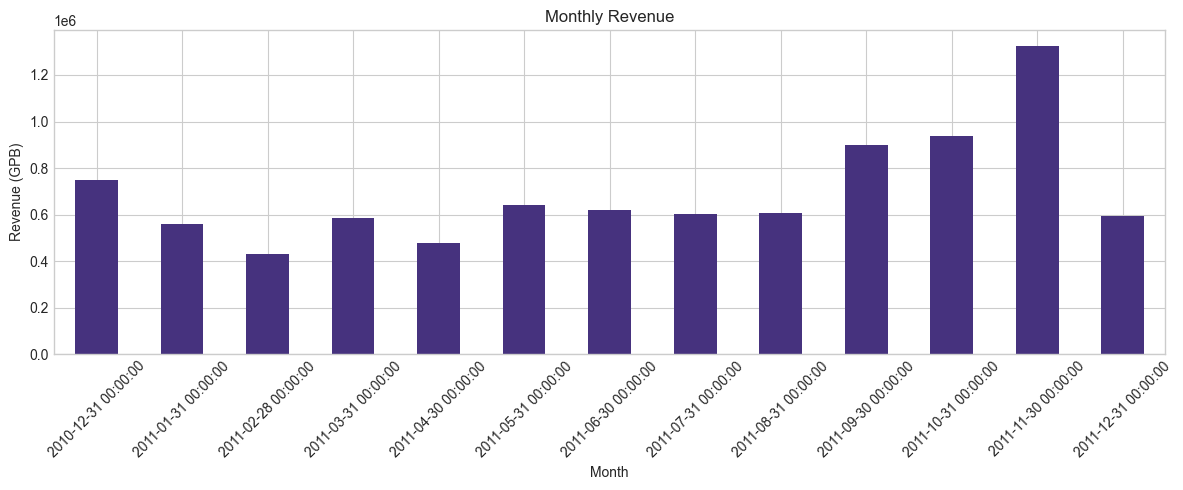

In [6]:
visualizer.plot_revenue_over_time(df_uk)

### Time patterns

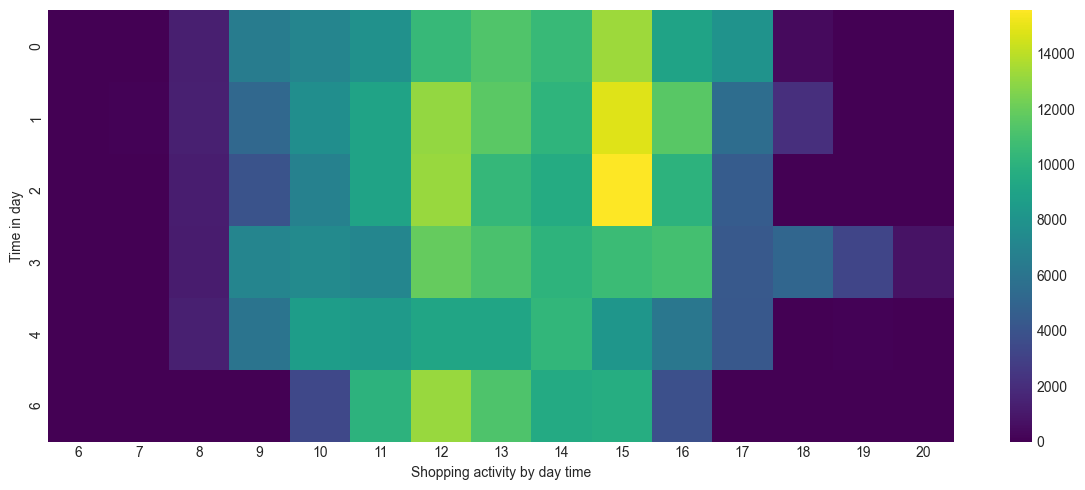

In [7]:
visualizer.plot_time_patterns(df_uk)

### Product analysis

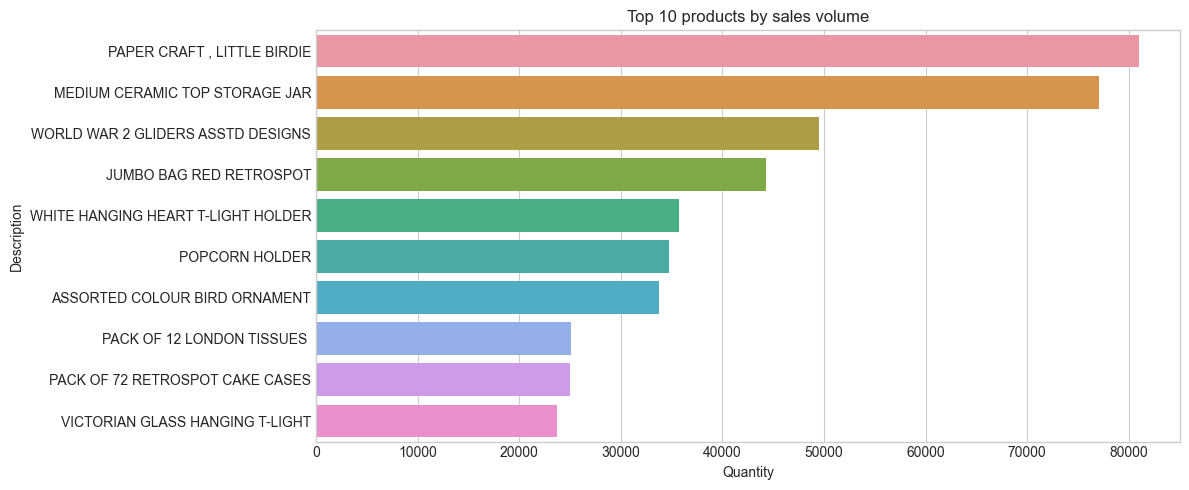

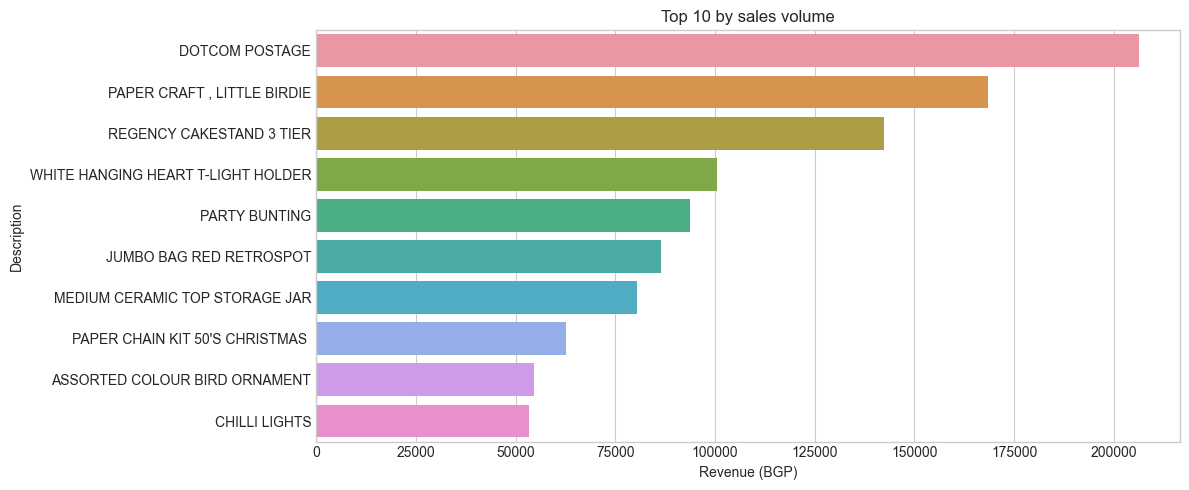

In [8]:
visualizer.plot_product_analysis(df_uk)

### Customer Analysis

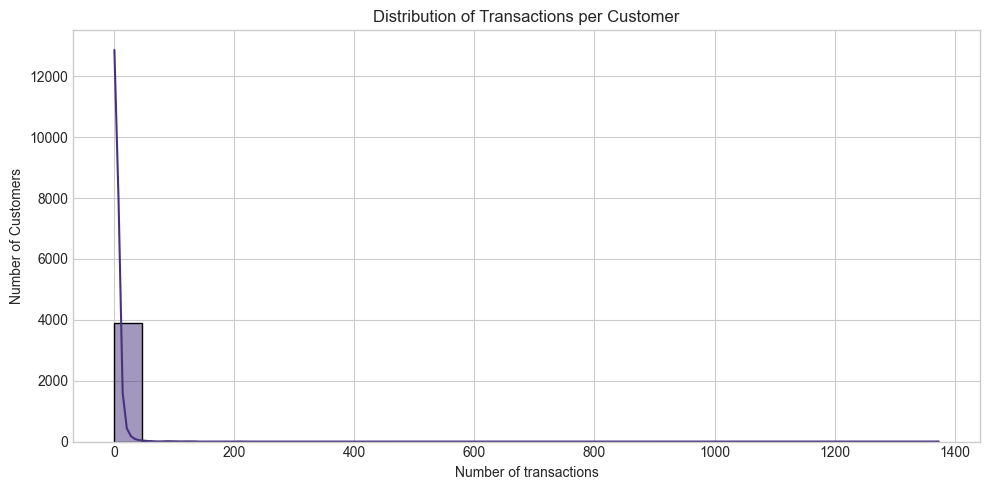

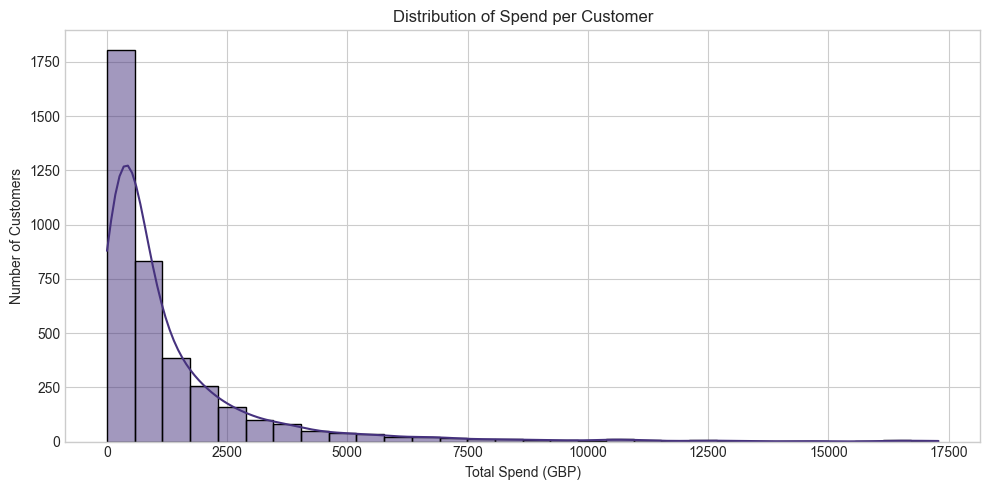

In [9]:
visualizer.plot_customer_distribution(df_uk)

In [10]:
spend_per_customer = df_uk.groupby("CustomerID")["TotalPrice"].sum()
transactions_per_customer = df_uk.groupby("CustomerID")["InvoiceNo"].nunique()

print("Analyze Customer Behavior:")
print(f"- Average Spend per Customer: £{spend_per_customer.mean():.2f}")
print(f"- Median Spend per Customer: £{spend_per_customer.median():.2f}")
print(f"- Average Transactions per Customer: {transactions_per_customer.mean():.2f} times")

spend_per_customer.describe()

Analyze Customer Behavior:
- Average Spend per Customer: £2301.77
- Median Spend per Customer: £652.74
- Average Transactions per Customer: 4.60 times


count    3.921000e+03
mean     2.301765e+03
std      2.839137e+04
min      3.750000e+00
25%      3.003600e+02
50%      6.527400e+02
75%      1.578670e+03
max      1.716831e+06
Name: TotalPrice, dtype: float64

### RFM Analysis

RFM is:
- **R**ecency: How long ago was the customer's last purchase?
- **F**requency: How often do they make purchases?
- **M**onetary: How much money do they spend?

In [11]:
rfm_data = cleaner.calculate_rfm()

print("RFM Data Analysis:")
print(f"- Average Recency: {rfm_data['Recency'].mean():.0f} days")
print(f"- Average Frequency: {rfm_data['Frequency'].mean():.1f} times")
print(f"- Average Monetary: £{rfm_data['Monetary'].mean():.2f}")

rfm_data.head(10)

RFM Data Analysis:
- Average Recency: 92 days
- Average Frequency: 4.6 times
- Average Monetary: £2301.77


,Recency,Frequency,Monetary
CustomerID,,,
000nan,1,1373,1716830.53
012346,326,1,77183.60
012747,2,11,4196.01
012748,1,209,33719.73
012749,4,5,4090.88
012820,3,4,942.34
012821,214,1,92.72
012822,71,2,948.88
012823,75,5,1759.50


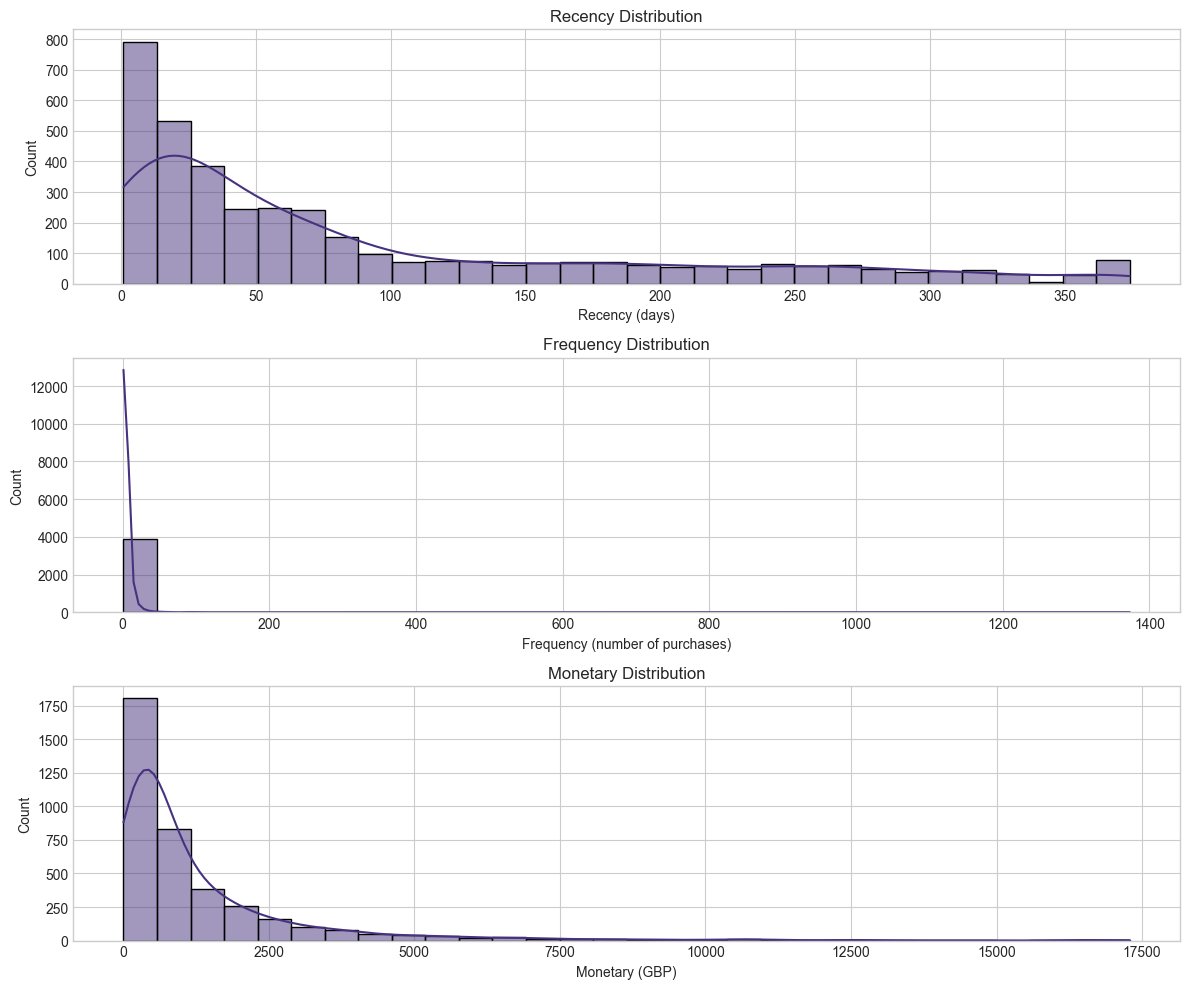

In [12]:
visualizer.plot_rfm_analysis(rfm_data)

### Save cleaned data

In [13]:
cleaner.save_cleaned_data()

print("Cleaned data saved!")
print(f"- File: cleaned_uk_data.csv")
print(f"- Size: {df_uk.shape[0]:,} rows")
print("- Ready for feature engineering and modeling.")

Cleaned data saved to ../data/processed/cleaned_uk_data.csv
Cleaned data saved!
- File: cleaned_uk_data.csv
- Size: 485,123 rows
- Ready for feature engineering and modeling.
